# Module 10 -- Active Information Storage -- Synthetic examples

In this notebook, we explore the AIS in several synthetic time series.

## 5. Active Information Storage with JIDT

In this activity we will write some simple code to calculate AIS on sample data.

1. Start by opening the AutoAnalyser and selecting Active Info Storage. Select a Discrete estimator, data file `2CoupledBinaryUseK2.txt`. and tick `Add stat. signif.?"`. Click `Generate Code and Compute`.
2. Copy and paste the the generated code into a new script/notebook. (Or copy and rename the file `GeneratedCalculator.m/.py` in `demos/AutoAnalyser` so it doesn't get overwritten later)
3. Replace the loaded data in `variable` with the following line:
``` python
variable = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0];
```
This is the first example plot you tried to predict the next value of in the activity above. You can plot the data if you like with the code:
``` python
import matplotlib.pyplot as plt
plt.scatter(range(1,len(variable)+1), variable, marker='x'); 
plt.ylabel('x(n)'); 
plt.xlabel('n'); 
plt.axis([0,20,0,1.1]); 
plt.grid();
```

In [1]:
# Paste the import and JVM startup lines here:

from jpype import *
import numpy
import sys
# Our python data file readers are a bit of a hack, python users will do better on this:
sys.path.append("/home/joseph/JIDT/infodynamics-dist-1.6.1/demos/python")
import readIntsFile

if (not isJVMStarted()):
    # Add JIDT jar library to the path
    jarLocation = "/home/joseph/JIDT/infodynamics-dist-1.6.1/infodynamics.jar"
    # Start the JVM (add the "-Xmx" option with say 1024M if you get crashes due to not enough memory space)
    startJVM(getDefaultJVMPath(), "-ea", "-Djava.class.path=" + jarLocation, convertStrings=True)


AIS_Discrete(col_0) = 1.0000 bits (null: 0.0431 +/- 0.0558 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)


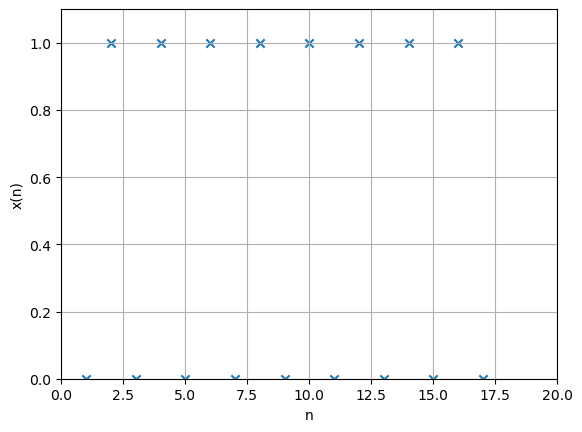

In [2]:
# Paste the code performing the actual analysis and plotting here:

# Hard code our time series examples:
variable = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0];

# Plot the data
import matplotlib.pyplot as plt
plt.scatter(range(1,len(variable)+1), variable, marker='x'); 
plt.ylabel('x(n)'); 
plt.xlabel('n'); 
plt.axis([0,20,0,1.1]); 
plt.grid();

# Set history length k
k = 1;

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
calc = calcClass(2, k)
# 2. No other properties to set for discrete calculators.
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.addObservations(variable)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()
# 6. Compute the (statistical significance via) null distribution empirically (e.g. with 100 permutations):
measDist = calc.computeSignificance(100)

print("AIS_Discrete(col_0) = %.4f bits (null: %.4f +/- %.4f std dev.; p(surrogate > measured)=%.5f from %d surrogates)" %\
    (result, measDist.getMeanOfDistribution(), measDist.getStdOfDistribution(), measDist.pValue, 100))

4. How much information storage did you predict for this example? Did this match the output from the code above? Do you need to change the history length $k$ parameter to be longer than the default of 1 to see the result you expect? You can use the AutoAnalyser to see the line of code to use to change the $k$ parameter to something other than its default value. Modify your code so that you can set any value for the k parameter:
  * Add a line such as `k = 1;` before the estimator is constructed, then
  * Change how the estimator is constructed to:
```python
calc = calcClass(2, k)
```
5. Repeat for the following examples (you can change the code in the cell above, or copy/paste and adjust in a new cell below). For these you may need to try up to `k=3` to see the information storage result that you expect:
  * `variable = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0];`
  * `variable = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0];`
  * `variable = [0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1];`
6. For the last example, you may be interested to examine the results of the statistical significance check to see that we haven't really supplied enough data to properly conclude on a pattern of information storage.

AIS_Discrete(col_0) = 0.8113 bits (null: 0.1841 +/- 0.1198 std dev.; p(surrogate > measured)=0.00000 from 100 surrogates)


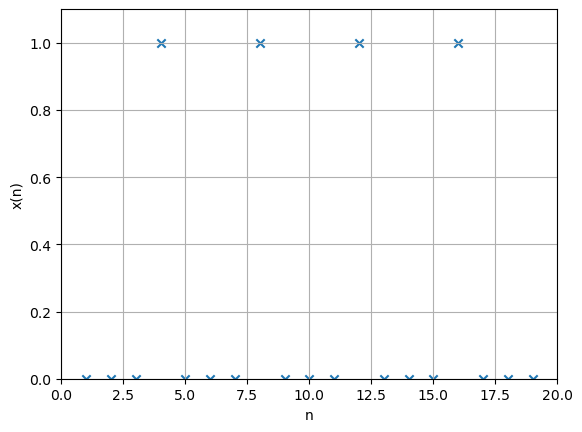

In [3]:
# Hard code our time series examples:
# variable = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0];
# variable = [0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0];
variable = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0];
# variable = [0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1];

# Plot the data
plt.scatter(range(1,len(variable)+1), variable, marker='x'); 
plt.ylabel('x(n)'); 
plt.xlabel('n'); 
plt.axis([0,20,0,1.1]); 
plt.grid();

# Set history length k
k = 3;

# 1. Construct the calculator:
calcClass = JPackage("infodynamics.measures.discrete").ActiveInformationCalculatorDiscrete
calc = calcClass(2, k)
# 2. No other properties to set for discrete calculators.
# 3. Initialise the calculator for (re-)use:
calc.initialise()
# 4. Supply the sample data:
calc.addObservations(variable)
# 5. Compute the estimate:
result = calc.computeAverageLocalOfObservations()
# 6. Compute the (statistical significance via) null distribution empirically (e.g. with 100 permutations):
measDist = calc.computeSignificance(100)

print("AIS_Discrete(col_0) = %.4f bits (null: %.4f +/- %.4f std dev.; p(surrogate > measured)=%.5f from %d surrogates)" %\
    (result, measDist.getMeanOfDistribution(), measDist.getStdOfDistribution(), measDist.pValue, 100))

# 6. Local active information storage with JIDT

In this activity we will continue the above activity, but examining local AIS on the same sample data. The local AIS is the pointwise or local mutual information from the previous k samples to the next sample.

1. Using the second last example with `variable = [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0];` let's compute and plot the local AIS values at each point in the time series. To do so:
    * Switch your code in the cell above back to that data set, and re-run it.
    * Then insert the following code into a new cell below and run it:
```python
# Pull out the local AIS values for each point in the time series:
localAISValues = calc.computeLocalFromPreviousObservations(variable);
figure(2);
# We only plot the local values from time index k onwards -- the AIS is undefined before this (localAISValues just fills these values with zeros)
plt.scatter(range(k+1,len(localAISValues)+1), localAISValues[k:end], marker='x'); 
plt.ylabel('AIS(n,k)'); 
plt.xlabel('n');
plt.title('Local AIS (k = %d)' % k);
plt.axis([0,20,-0.5,2.2]); 
plt.grid();
```

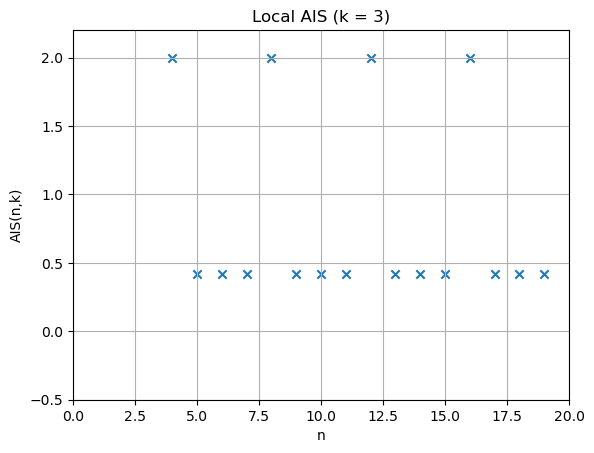

In [4]:
# Pull out the local AIS values for each point in the time series:
localAISValues = calc.computeLocalFromPreviousObservations(variable);
# We only plot the local values from time index k onwards -- the AIS is undefined before this (localAISValues just fills these values with zeros)
plt.scatter(range(k+1,len(localAISValues)+1), localAISValues[k:], marker='x'); 
plt.ylabel('AIS(n,k)'); 
plt.xlabel('n');
plt.title('Local AIS (k = %d)' % k);
plt.axis([0,20,-0.5,2.2]); 
plt.grid();


Explain why there is greater active information storage at some updates of the time series compared to others.